## Importing Basic Packages

In [4]:
from sparkhalos.simulprocess import abacussummit
from sparkhalos.simulprocess.simparams import SimuParams
from sparkhalos.hstats.hmfcalc import dndlnm, hmfcalc
from sparkhalos.hstats.cic import cic_halos


datalocation = "/mnt/dark/Projects/3.CUSAT/Data"
params = SimuParams.init(datalocation, abacussummit.simparams, type= "small", intcont= "ph3000", boxsize=500)

# Redshifts to be computed
# redshifts = ["3.000","2.000","1.100","0.500","0.200"]
redshifts = ["3.000"]
totalbins = 50

## Calculating hmf

In [ ]:
for redshift in redshifts:
    hmf = hmfcalc(redshift)
    halomf, bin_centers = dndlnm(params, redshift, totalbins)

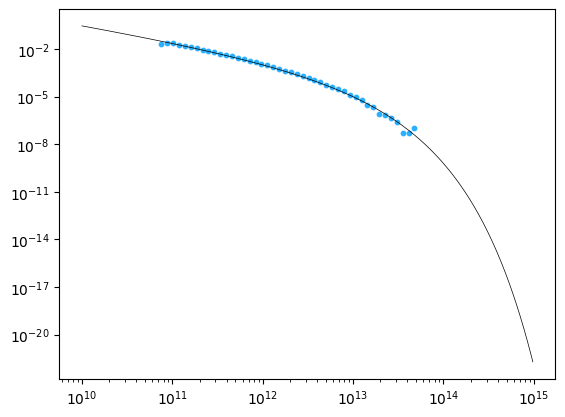

In [5]:
# Ploting HMF
import matplotlib.pyplot as plt
plt.scatter(bin_centers, halomf, color = '#2ab0ff' , s=10)
plt.loglog(hmf.m,hmf.dndlnm, linewidth=0.5, color ='k')

## CIC for halos

In [5]:
for redshift in redshifts:
    nw_boxsize = 25
    boxdata = cic_halos(params, redshift, nw_boxsize, totalbins)

Reading file


TypeError: 'float' object cannot be interpreted as an integer

In [ ]:

plt.hist(np.sum(boxdata, axis=0), bins=bins, density=True, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5, alpha = 0.15)

In [3]:
for redshift in redshifts:
    abacussummit.mass_pos(params, redshift)


Status: Extracting the mass and position of the particles
Reading the data
converting to mass
Writing the processed data to the file


In [2]:
import os
from astropy.io import ascii

for redshift in redshifts:
    pathset = os.path.join(
        params.datadirec,
        "ProcessedData",
        "AbacusSummit_" + params.type + "_" + params.cosmo + "_" + params.intcont,
        "halos/z" + redshift,
    )

    # check the directory does not exist
    if not (os.path.exists(pathset)):
        print("Processed file does not exist")

    print("Reading file")

    # Reads the data to be used for caluclating hmf
    data = ascii.read(os.path.join(pathset, params.filename_notime + "_" + redshift + ".dat"))    

Reading file


In [3]:
from math import factorial as fact, sqrt as sq, exp, pi
from scipy.special import gamma, gammaln
import math
import numpy as np
import os
from astropy.io import ascii
from astropy.table import Column

In [4]:
nw_boxsize = 100
cutside = params.boxsize/nw_boxsize
totalboxes = int(cutside**3)

In [7]:
data_bckp = data

In [82]:
data = np.lib.recfunctions.structured_to_unstructured(data)

array([1.19650269e-06, 4.98672485e-07, 4.51080322e-07, ...,
       4.99376282e-04, 4.99337006e-04, 4.99477966e-04])

In [76]:
x = data
x["xpos"] = data["xpos"]/nw_boxsize
x["ypos"] = data["ypos"]/nw_boxsize
x["zpos"] = data["ypos"]/nw_boxsize

binedge = np.logspace(
    np.log(np.min(data["N"])),
    np.log(np.max(data["N"])),
    totalbins + 1,
    base=math.e,
)

dm = np.log10(binedge[1])-np.log10(binedge[0])

boxno = x["xpos"] + cutside*x["ypos"] + cutside**2*x["zpos"]
print(boxno)
boxes = np.array(boxno)
data = np.array(data)


boxdata = np.zeros((totalbins,totalboxes))
for i in range(len(boxes)):
    f = int((np.log10(data['N'][i]) - np.log10(binedge[0]))/dm)
    boxdata[f][boxes[i]] = boxdata[f][boxes[i]]+1


#Box halo numbers
# boxdata = np.zeros((totalbins,totalboxes))

# for f in range(totalboxes):
#     data_fil = data["N"][data["boxno"] == f]
#     for i in range(totalbins):
#         boxdata[i][f] = len(data_fil["N"][int((np.log10(data_fil["N"]) - np.log10(binedge[0]))/dm) == i])

         xpos         
----------------------
 7.250312805175781e-06
1.1441879272460937e-06
 5.566337585449218e-06
3.6302413940429687e-06
 4.964199066162109e-06
 5.911968231201173e-06
1.1936340332031248e-06
  7.42716598510742e-06
 6.623188018798828e-06
6.8757858276367196e-06
                   ...
  0.003121396408081054
 0.0031201259613037107
  0.003119753189086915
  0.003120801254272461
  0.003120563888549805
  0.003122342681884766
  0.003121408660888672
 0.0031214009094238286
 0.0031236086807250978
 0.0031200673751831053
 0.0031218383865356447
Length = 3346751 rows


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [75]:
data = data_bckp
data

N,xpos,ypos,zpos
float64,float64,float64,float64
432361711692.8779,0.0001196502685546875,0.0001153106689453125,1.153106689453125e-06
78036016256.76334,4.986724853515625e-05,1.22955322265625e-05,1.22955322265625e-07
73817853215.85721,4.51080322265625e-05,9.74334716796875e-05,9.74334716796875e-07
94908668420.38783,5.67047119140625e-05,5.83465576171875e-05,5.83465576171875e-07
261526108536.1798,9.037322998046875e-05,7.734222412109375e-05,7.734222412109374e-07
103344994502.20009,5.1112365722656255e-05,0.00010287322998046875,1.0287322998046876e-06
130763054268.0899,1.621551513671875e-05,1.9647216796874998e-05,1.9647216796874998e-07
196144581402.13486,7.51953125e-05,0.00012714691162109374,1.2714691162109373e-06
118108565145.37152,7.86712646484375e-05,0.00011117095947265625,1.1117095947265626e-06


In [73]:
dataarray = np.array(data)


In [74]:
dataarray['xpos'][2]

4.51080322265625e-05

In [24]:
datanew["xpos"] /=3

In [25]:
x["xpos"] = data["xpos"]

NameError: name 'x' is not defined

In [1]:
import numpy as np
print(np.__version__)

1.24.0


In [4]:
type(2.109081520453063*10**9)

float

In [4]:
np.log(binedge[i]) <= np.log(data["N"]

SyntaxError: incomplete input (251754521.py, line 1)